# Clustering Notebook

In this notebook, we are going to cover 3 common clustering techniques; K-means, Hierarchical, and DBSCAN. 

First, we need to bring in the data we are going to use. We are going to use the iris dataset like we did in the PCA tutorial. The iris dataset contains plant types and their features. In the dataset there are targets and each target is described by four features. There are 3 possible plant type targets in the dataset.

In [32]:
# module for data
from sklearn import datasets
# plotting tool
import matplotlib.pyplot as plt

`Quick Note:` it is always good practice to only what you need from a module rather than using * to pull the entire module. 

In [33]:
# get data
iris_data = datasets.load_iris()

## Review Data

This is a predefined dataset, we can check what methods that are available for the dataset using the following statement. 

In [34]:
print(dir(iris_data))

['DESCR', 'data', 'feature_names', 'target', 'target_names']


Lets print the features of the dataset.

In [35]:
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Lets print the names of the plants in the dataset.

In [36]:
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


## Plot the Data

Lets plot sepal width vs sepal length

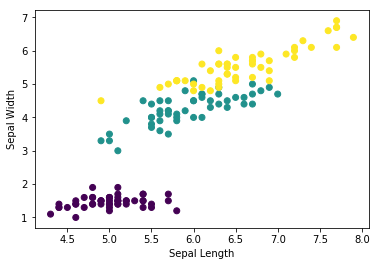

In [77]:
# dataset slicing to get two features only
x_axis = iris_data.data[:, 0]  # Sepal Length
y_axis = iris_data.data[:, 2]  # Sepal Width

# plotting
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(x_axis, y_axis, c=iris_data.target)
plt.show()

We can see from the above plot that the 3 types of plants are well seperated by sepal length and sepal width

## K-means Clustering

K means is an iterative clustering algorithm that aims to find the local maxima of each cluster with each iteration. The algorithm requires user input for the number of clusters that the data should be grouped into. Since we know that there are 3 types of plants in the dataset, we program the algorithm to group the data into 3 classes, by passing the parameter “n_clusters” into our KMeans model. We would not normally know the number of classes in unsupervised learning. 

In the first iteration of the algorithm, the center points of the 3 clusters are randomly assigned. Then each observation will be are assigned to one of the three clusters based on the distance between each observation and the center point each cluster. Each observation is assigned to the closest cluster. 

Within the next iteration, the cluster center points are recalculated, this is done by calculating the average observation for each cluster. Each observation is then reassigned to a cluster based on the distance between each observation and the center point each cluster. 

This process is repeated until the center points of each cluster do not change from one iteration to the next. 

K-means is often used for customer segmentation. [This](https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac) article explains the purpose of customer segmentation and builds on how the K-means algorithm can be used to complete customer segmentation. The article explains the K-means algorithm in detail and further explains how to determine the optimum number of clusters using a scree plot. The coding blocks contained in the article are written in R and are useful if you would ever like to learn R. 

In [20]:
# import Kmeans module
from sklearn.cluster import KMeans

In [22]:
# declare a Kmeans instance with 3 classes
model = KMeans(n_clusters=3)

In [23]:
# fit data 
model.fit(iris_data.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
# get clusters
clusters = model.predict(iris_data.data)

For each observation in the dataset, we can see what cluster it was assigned to. 

In [26]:
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


## Hierarchical Clustering

Hierarchical clustering, as the name implies is an algorithm that builds a hierarchy of clusters. The algorithm starts by stating that all observations in a dataset belong to one cluster. Then, the next two closest observations are grouped into a cluster. This process is repeated until only one cluster is left (all observations have been grouped). 

This [link](https://www.youtube.com/watch?v=OcoE7JlbXvY) further explains the algorithm and explains the different distances that can be used in clustering.

We are going to perform clustering using linkage distance.

In [29]:
# import the linkage and dendrogram packages
from scipy.cluster.hierarchy import linkage, dendrogram

In [30]:
# calculate the clusters
clusters = linkage(iris_data.data, method='complete')

The results of a hierarchical clustering can be shown using a dendrogram. We are going to plot one below. 

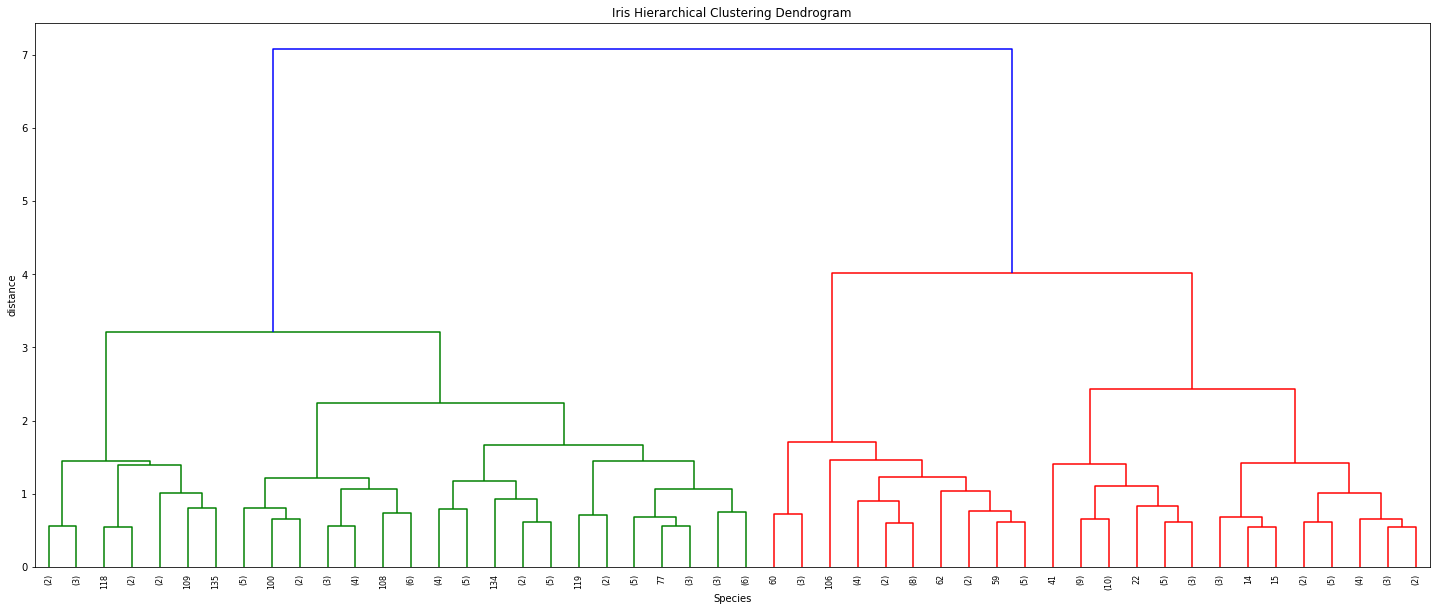

In [47]:
# set plot parameters
plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')

# create plot
dendrogram(clusters,
           leaf_rotation=90,
           leaf_font_size=8,
           # show only the last 50 merged clusters and try changing values of p
           truncate_mode='lastp',  
           p=50,                 
           )
plt.show()

The above plot shows the last 50 clusters created by the algorithm. You can change the value of `p` to change the number of clusters produced by the algorithm. 

A major difference between K-means and Hierarchical clustering, is that Hierarchical can’t handle big data when  K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).

## DBSCAN Clustering

Density-Based Spatial Clustering of Applications with Noise is a clustering technique that has begun to replace K-Means. One key feature that DBSCAN has, is that it does not require a user to input the number of clusters to be created. 

Please watch [this](https://www.youtube.com/watch?v=a69-jHtawEo) video explaining DBSCAN and its parameters.

In [49]:
# import DBSCAN module
from sklearn.cluster import DBSCAN

The scikit-learn implementation provides a default for the eps and min_samples parameters, but you’re generally expected to tune those. The eps parameter is the maximum distance between two data points to be considered in the same neighborhood. The min_samples parameter is the minimum amount of data points in a neighborhood to be considered a cluster.

In [50]:
# declaring DBSCAN model
dbscan = DBSCAN()

In [51]:
# fit data
dbscan.fit(iris_data.data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [74]:
# print the clusters produced by DBSCAN the model
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


Please comapre the clusters produced by DBSCAN and K-means. We can see that on this very small dataset the produce very similar results.

Lets plot the clustering results. 

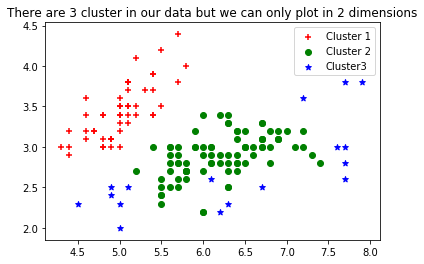

In [73]:
# plot based on cluster
for i in range(len(dbscan.labels_)):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(iris_data.data[i, 0], iris_data.data[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(iris_data.data[i, 0], iris_data.data[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(iris_data.data[i, 0], iris_data.data[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster3'])
plt.title('There are 3 cluster in our data but we can only plot in 2 dimensions')
plt.show()

We can see from the above plot that clusters 1 and 2 are well separated using first and second features of the iris features. These are sepal length and sepal width. Please play around with the other dimensions to see if you can get better separation for cluster 3.

# End of Notebook

Please return to week 3's slides.